# Making the triangle :

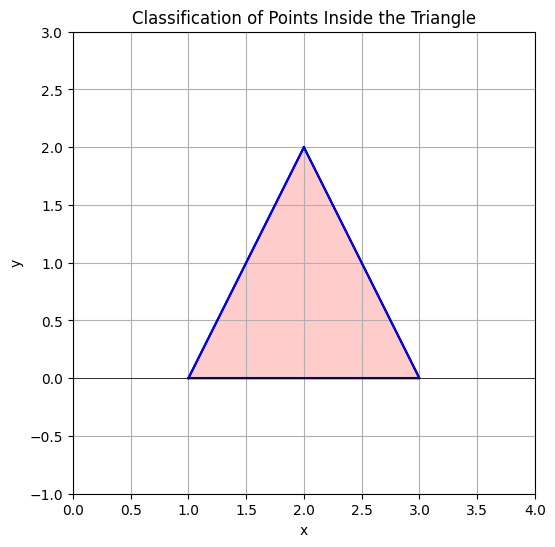

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def perceptron(x, y):
    # Weights and biases for each condition
    weights_1 = np.array([0, 1])
    bias_1 = 0

    weights_2 = np.array([2, -1])
    bias_2 = -2

    weights_3 = np.array([-2, -1])
    bias_3 = 6

    # Conditions as perceptron linear combinations
    condition_1 = np.dot(weights_1, np.array([x, y])) + bias_1 > 0
    condition_2 = np.dot(weights_2, np.array([x, y])) + bias_2 > 0
    condition_3 = np.dot(weights_3, np.array([x, y])) + bias_3 > 0

    # Return True if all conditions are met
    return condition_1 and condition_2 and condition_3


# Generate a grid of points
x_vals = np.linspace(0, 4, 800)
y_vals = np.linspace(-1, 3, 800)
X, Y = np.meshgrid(x_vals, y_vals)

# Classify each point in the grid
Z = np.array([[perceptron(x, y) for x in x_vals] for y in y_vals])

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([1, 2], [0, 2], 'k-')
ax.plot([1, 3], [0, 0], 'k-')
ax.plot([2, 3], [2, 0], 'k-')
triangle = Polygon([[1, 0], [2, 2], [3, 0]], closed=True, edgecolor='black', facecolor='#ffcccc' )

# Plot the triangle in blue
triangle_points = np.array([[1, 0], [2, 2], [3, 0], [1, 0]])
plt.plot(triangle_points[:,0], triangle_points[:,1], color='blue', label='Triangle')

ax.add_patch(triangle)
ax.set_xlim(0, 4)
ax.set_ylim(-1, 3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Classification of Points Inside the Triangle')
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
plt.show()


# Without activation Function :

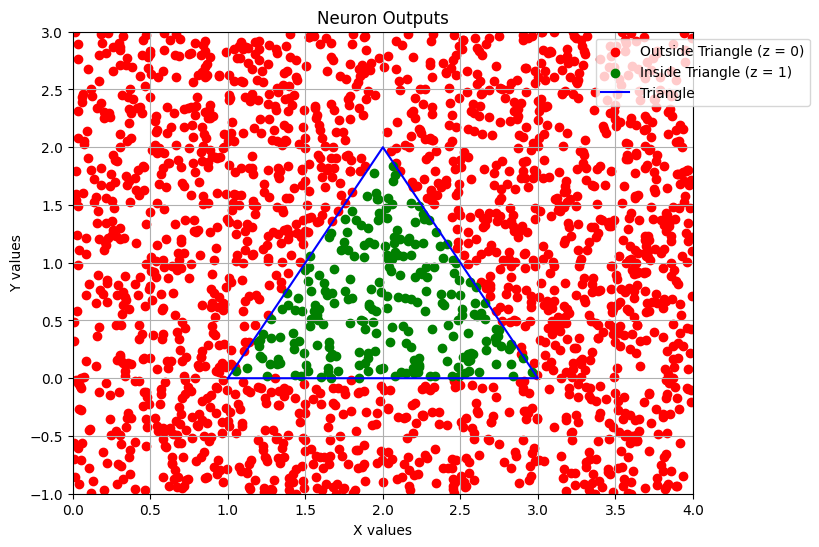

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(x, y):
    # Weights and biases for each condition
    weights_1 = np.array([0, 1])
    bias_1 = 0

    weights_2 = np.array([2, -1])
    bias_2 = -2

    weights_3 = np.array([-2, -1])
    bias_3 = 6

    # Conditions as perceptron linear combinations
    condition_1 = np.dot(weights_1, np.array([x, y])) + bias_1 > 0
    condition_2 = np.dot(weights_2, np.array([x, y])) + bias_2 > 0
    condition_3 = np.dot(weights_3, np.array([x, y])) + bias_3 > 0

    # Return True if all conditions are met
    return condition_1 and condition_2 and condition_3

# Define the  neuron function for your network
def Area(x, y):
    return perceptron(x, y)

# Generate random data points
num_points = 2000  # Increased number of points for better visualization
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z_value = Area(x_values[i], y_values[i])
    if z_value == False:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points) if green_points else ([], [])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='Outside Triangle (z = 0)')
plt.scatter(green_x, green_y, color='green', label='Inside Triangle (z = 1)')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Neuron Outputs')

# Plot the triangle in blue
triangle_points = np.array([[1, 0], [2, 2], [3, 0], [1, 0]])
plt.plot(triangle_points[:,0], triangle_points[:,1], color='blue', label='Triangle')

plt.grid(True)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.show()


# With Activation Function :

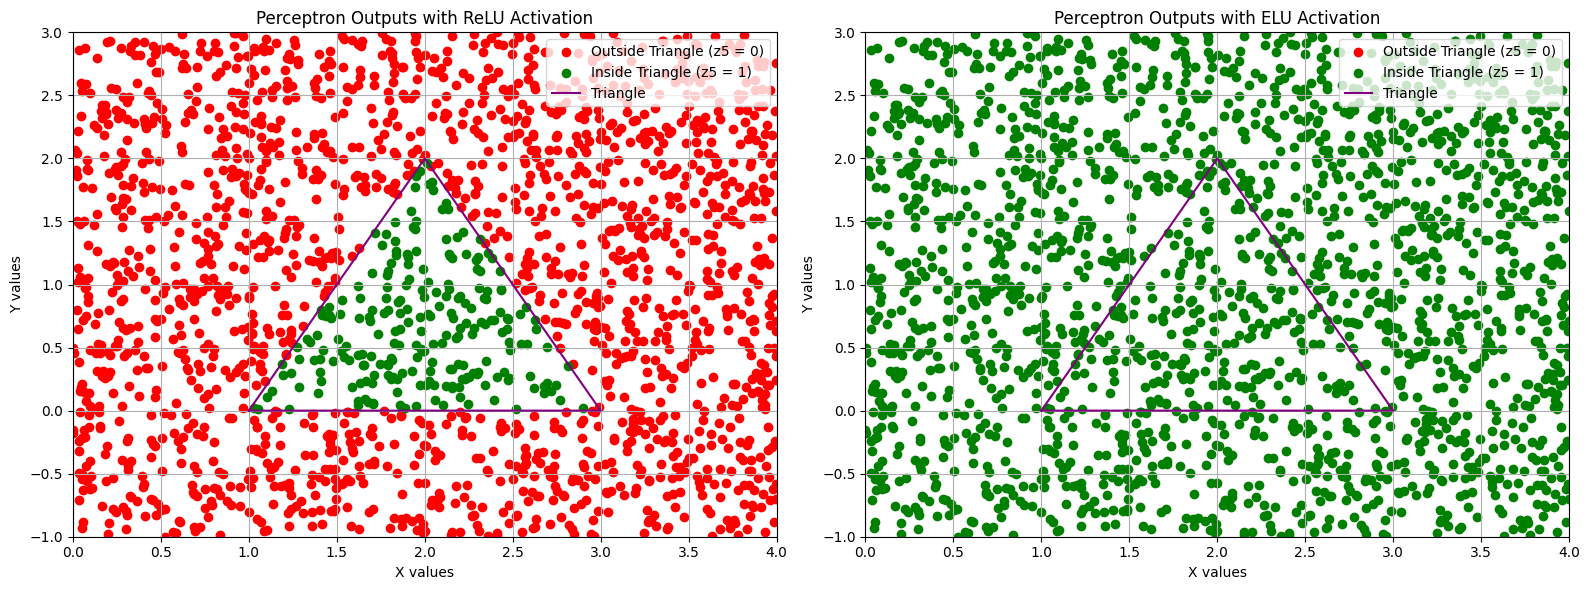

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the perceptron function with ReLU activation
def perceptron_relu(x, y):
    weights_1 = np.array([0, 1])
    bias_1 = 0
    weights_2 = np.array([2, -1])
    bias_2 = -2
    weights_3 = np.array([-2, -1])
    bias_3 = 6

    def relu(z):
        return max(0, z)

    output_1 = relu(np.dot(weights_1, np.array([x, y])) + bias_1)
    output_2 = relu(np.dot(weights_2, np.array([x, y])) + bias_2)
    output_3 = relu(np.dot(weights_3, np.array([x, y])) + bias_3)

    return bool(output_1 and output_2 and output_3)

# Define the perceptron function with ELU activation
def perceptron_elu(x, y, alpha=.1):
    weights_1 = np.array([0, 1])
    bias_1 = 0
    weights_2 = np.array([2, -1])
    bias_2 = -2
    weights_3 = np.array([-2, -1])
    bias_3 = 6

    def elu(z, alpha):
        return z if z > 0 else alpha * (np.exp(z) - 1)

    output_1 = elu(np.dot(weights_1, np.array([x, y])) + bias_1, alpha)
    output_2 = elu(np.dot(weights_2, np.array([x, y])) + bias_2, alpha)
    output_3 = elu(np.dot(weights_3, np.array([x, y])) + bias_3, alpha)

    return bool(output_1 and output_2 and output_3)

# Define the McCulloch-Pitts neuron function for your network using ReLU activation
def Area_relu(x, y):
    return perceptron_relu(x, y)

# Define the McCulloch-Pitts neuron function for your network using ELU activation
def Area_elu(x, y):
    return perceptron_elu(x, y)

# Generate random data points
num_points = 2000  # Increased number of points for better visualization
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Initialize lists to store data points for different z5 values
red_points_relu = []
red_points_elu = []
green_points_relu = []
green_points_elu = []

# Evaluate data points using the Area functions
for i in range(num_points):
    z5_value_relu = Area_relu(x_values[i], y_values[i])
    z5_value_elu = Area_elu(x_values[i], y_values[i])
    if z5_value_relu == False:
        red_points_relu.append((x_values[i], y_values[i]))
    else:
        green_points_relu.append((x_values[i], y_values[i]))
    if z5_value_elu == False:
        red_points_elu.append((x_values[i], y_values[i]))
    else:
        green_points_elu.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points (ReLU)
red_x_relu, red_y_relu = zip(*red_points_relu) if red_points_relu else ([], [])
green_x_relu, green_y_relu = zip(*green_points_relu) if green_points_relu else ([], [])

# Separate x and y values for red and green points (ELU)
red_x_elu, red_y_elu = zip(*red_points_elu) if red_points_elu else ([], [])
green_x_elu, green_y_elu = zip(*green_points_elu) if green_points_elu else ([], [])

# Plotting
plt.figure(figsize=(16, 6))

# Plot for ReLU activation
plt.subplot(1, 2, 1)
plt.scatter(red_x_relu, red_y_relu, color='red', label='Outside Triangle (z5 = 0)')
plt.scatter(green_x_relu, green_y_relu, color='green', label='Inside Triangle (z5 = 1)')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Perceptron Outputs with ReLU Activation')
plt.plot(triangle_points[:,0], triangle_points[:,1], color='purple', label='Triangle')
plt.grid(True)
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.legend()

# Plot for ELU activation
plt.subplot(1, 2, 2)
plt.scatter(red_x_elu, red_y_elu, color='red', label='Outside Triangle (z5 = 0)')
plt.scatter(green_x_elu, green_y_elu, color='green', label='Inside Triangle (z5 = 1)')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Perceptron Outputs with ELU Activation')
plt.plot(triangle_points[:,0], triangle_points[:,1], color='purple', label='Triangle')
plt.grid(True)
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.legend()

plt.tight_layout()
plt.show()
